
===== Budget Summary =====
Remaining Budget: $1570.00

Category Breakdown:
Highest Spending Category: School              
Spending: $50.00
Lowest Spending Category:Shopping            
Spending: $30.00

Monthly Breakdown:
Highest Spending Month: 09
Spending: $50.00
Lowest Spending Month: 12
Spending: $35.00

You are within budget. Keep it up!



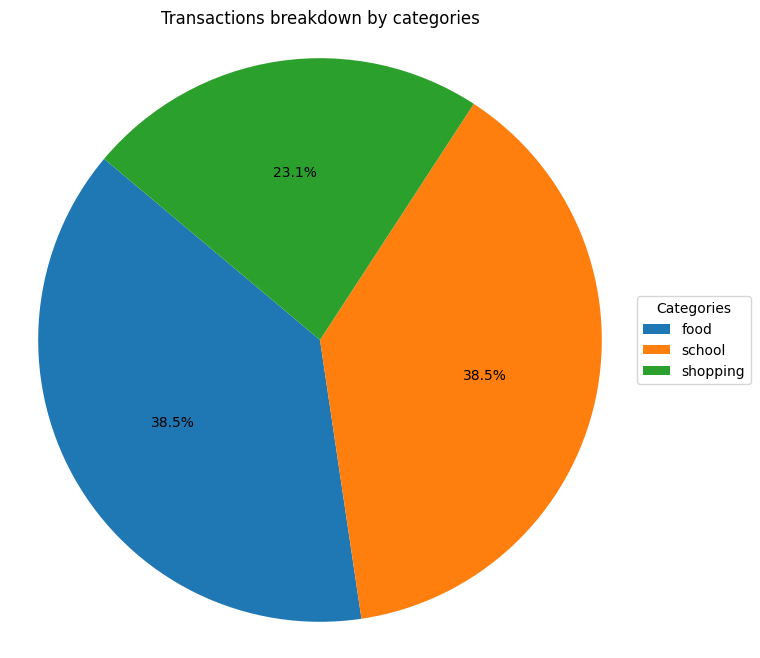

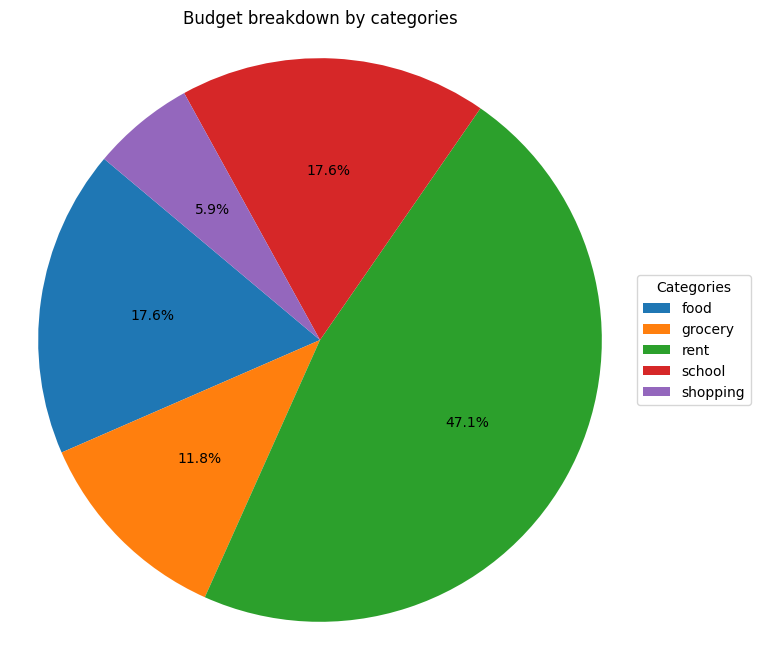

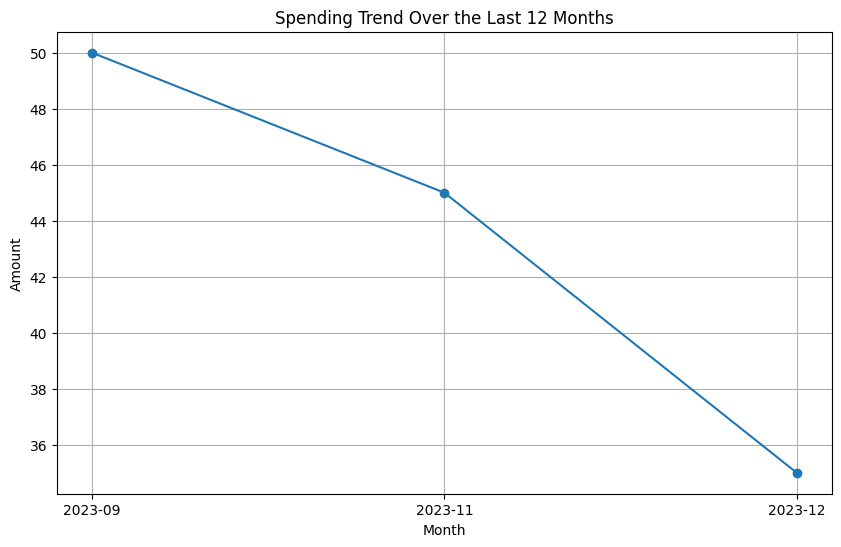

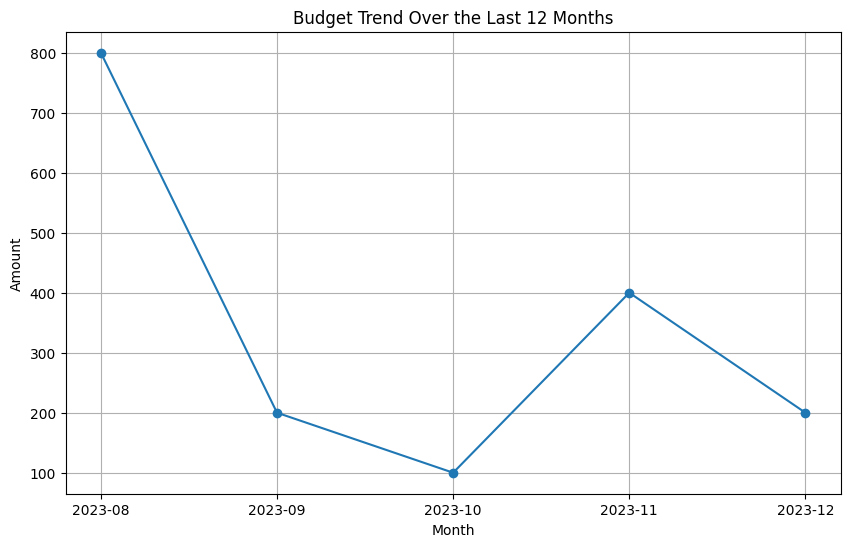

In [147]:
from datetime import datetime
from utilities import users
from utilities.helper import calculation_query, spending_query, linechart_query
%reload_ext autoreload
%autoreload 2

# user = users.User(budget = 'budgeting.db', transactions = "transactions.db")
# print(user.total(categories = "food"))
# print(user.total())
# print(user.total(type="budget"))
# print(user.total(type="budget", categories="food"))
# print(user.total(type="budget", years=2023))

# print(user.remaining_budget())
# print(user.remaining_budget(categories="food", month=11))
# print(user.remaining_budget(categories="food"))

# print(user.average(categories="food"))
# print(user.average(months=11))
# print(user.average(type="budget", months=11))
# print(user.average(type="budget", years=2023))

# user.highest_spending()
# user.highest_spending(False)
# user.lowest_spending()
# user.lowest_spending(False)
# cat_list = ["food", "school", "rent", "grocery"]
# limit_list = [100, 200, 800, 200]
# date_list = [datetime.strptime("2023-10", '%Y-%m').date(), datetime.strptime("2023-9", '%Y-%m').date(), datetime.strptime("2023-8", '%Y-%m').date(), datetime.strptime("2023-12", '%Y-%m').date()]
# user.budget.add_from_lists(cat_list, limit_list, date_list)
# user.transactions.add_transaction("school", 50, "2023-09-10", "upass")

user.summary()
user.pie_chart()
user.pie_chart("budget")
user.line_chart()
user.line_chart("budget")


In [146]:
import os
import sqlite3

categories = ['food']
month = 11
year = 2023

# Connect to the SQLite database
connection_budget = sqlite3.connect('budgeting.db')
connection_transactions = sqlite3.connect('transactions.db')
# Create a cursor object to interact with the database
cursor_bg = connection_budget.cursor()
cursor_ts = connection_transactions.cursor()
# Execute a query to fetch table names
cursor_bg.execute("""
                SELECT printf('%d-%02d', year, month) AS month, SUM(amount)
                FROM budget
                WHERE printf('%d-%02d', year, month) BETWEEN '2022-12' AND '2023-12'
                GROUP BY year, month
                ORDER BY month;
                """)

# query = f"SELECT SUM(amount) FROM transactions WHERE category IN ({', '.join('?' for _ in categories)}) AND strftime('%m', trans_date) = ? AND strftime('%Y', trans_date) = ?"
# cursor_ts.execute(query, categories + [str(month).zfill(2), str(year)])
# cursor_ts.execute("SELECT category, SUM(amount) FROM transactions GROUP BY category ORDER BY SUM(amount) DESC;")
cursor_ts.execute("SELECT * FROM transactions;")
# cursor_ts.execute("SELECT strftime('%m', trans_date) as month, SUM(amount) FROM transactions GROUP BY month")
# Fetch all the table names from the result set
rows_bg = cursor_bg.fetchall()
rows_ts = cursor_ts.fetchall()
# Print the table names
# total_budget = cursor_bg.fetchone()[0]
# print(total_budget)
# for row in rows_bg:
#     print(row)
print([row for row in rows_bg])
# print([row[0] for row in rows_bg])
# print([row for row in rows_tss])
for row in rows_ts:
    print(row)

# total_spending = cursor_ts.fetchone()[0]
# print(total_spending)
# Close the cursor and the connection
cursor_bg.close()
cursor_ts.close()
connection_budget.close()
connection_transactions.close()

[('2023-08', 800), ('2023-09', 200), ('2023-10', 100), ('2023-11', 400), ('2023-12', 200)]
(2, '2023-11-28', 'dinner', 'food', 15)
(3, '2023-11-28', 'shirt', 'shopping', 30)
(4, '2023-12-01', 'lunch', 'food', 10)
(5, '2023-12-01', 'lunch', 'food', 11)
(6, '2023-12-01', 'lunch', 'food', 14)
(7, '2023-09-10', 'upass', 'school', 50)
